# Analysis of Air Quality and Asthma Hospitalizations in the US

## Introduction
This notebook examines the relationship between air quality and asthma-related hospitalizations across US states. I focus on the United States due to the availability of data for both air quality (measured by PM2.5 concentrations) and hospitalizations, which was not readily accessible for other regions.

This analysis builds on prior findings from our air quality and asthma prevalence study, where I identified a counterintuitive negative correlation between air quality and asthma prevalence. To investigate further, this notebook will analyze whether poorer air quality (higher PM2.5 levels) correlates with increased asthma-related hospitalizations, representing severe asthma symptoms. My hypothesis is that poorer air quality will correspond to higher hospitalization rates, showing a positive correlation between PM2.5 concentrations and hospitalizations due to asthma.

## Preparation of Data
The data preparation involves several phases:
1. **Import dependencies**: Import necessary libraries for data handling and analysis.
2. **Load the datasets**: Import the cleaned air quality data and asthma hospitalization data for US states.
3. **Merge datasets**: Combine both datasets to facilitate a year-over-year and state-by-state comparison.

After preparation, I will proceed with analysis to explore correlations and trends between air quality and asthma hospitalizations.


In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import hvplot.pandas
import requests

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

## Dataset 1: Air Quality per US States
First, import the cleaned dataset containing air quality data (PM2.5 concentrations) for each US state by year. This dataset is loaded into a DataFrame and displayed for an initial preview.


In [2]:
# Load cleaned air quality data
air_quality_path = Path("Cleaned_Data/cleaned_airquality_usstates.csv")
air_quality_df = pd.read_csv(air_quality_path)

# Preview the air quality dataset
print("Air Quality Data Preview:")
display(air_quality_df.head())

Air Quality Data Preview:


,State,Year,PM25
0,Arizona,2015,27.200214
1,Arizona,2016,27.580214
2,Arizona,2017,29.558201
3,Arizona,2018,27.994505
4,Arizona,2019,22.716542


In [6]:
#rename column title for accuracy
air_quality_df = air_quality_df.rename(columns={'PM25': 'PM2.5'})
air_quality_df

,State,Year,PM2.5
0,Arizona,2015,27.200214
1,Arizona,2016,27.580214
2,Arizona,2017,29.558201
3,Arizona,2018,27.994505
4,Arizona,2019,22.716542
...,...,...,...
219,Wisconsin,2017,29.645503
220,Wisconsin,2018,32.774725
221,Wisconsin,2019,32.829474
222,Wisconsin,2020,32.178571


## Dataset 2: Asthma Hospitalizations per US States
Next, the cleaned dataset for asthma hospitalizations across US states by year is loaded. This data provides insights into asthma-related hospital admissions, which we’ll analyze alongside air quality data. 

The hospitalization values are currently saved as strings with comma-separated thousands. These values will be converted to a numeric format using a pandas function to prepare them for analysis. The data is then displayed to confirm successful conversion.



In [7]:
# Load cleaned asthma hospitalizations data
hospitalizations_path = Path("Cleaned_Data/cleaned_hospitalizations.csv")
hospitalizations_df = pd.read_csv(hospitalizations_path)

# Preview the hospitalizations dataset
print("\nAsthma Hospitalizations Data Preview:")
display(hospitalizations_df.head())



Asthma Hospitalizations Data Preview:


,State,Year,Number of Hospitalizations
0,Arizona,2015,"4,894"
1,Arizona,2016,"3,431"
2,Arizona,2017,"3,237"
3,Arizona,2018,"3,161"
4,Arizona,2019,"2,960"


In [8]:

# Copy the DataFrame for further processing
hospital_df = hospitalizations_df.rename(columns={'Number of Hospitalizations': 'Hosp.'})

# Convert hospitalizations data from string to numeric, accounting for comma-separated thousands
# Example: '1,042' is converted to 1042.0
hospital_df["Hosp."] = pd.to_numeric(hospital_df['Hosp.'].str.replace(",", ""), errors='coerce')

# Display the processed DataFrame
hospital_df

,State,Year,Hosp.
0,Arizona,2015,4894
1,Arizona,2016,3431
2,Arizona,2017,3237
3,Arizona,2018,3161
4,Arizona,2019,2960
...,...,...,...
171,Wisconsin,2017,2019
172,Wisconsin,2018,2020
173,Wisconsin,2019,1687
174,Wisconsin,2020,934


## Merging Datasets

To analyze the relationship between air quality and asthma hospitalizations, we merge the two DataFrames on common columns: states and years. An "inner" join is used for this.


In [9]:
# Merge the air quality and hospitalizations DataFrames on 'State' and 'Year' columns
# Using an inner join to keep only records with data in both datasets
airquality_hospitalizations_df = pd.merge(air_quality_df, hospital_df, on=['State', 'Year'], how='inner')

# Display the merged DataFrame
airquality_hospitalizations_df


,State,Year,PM2.5,Hosp.
0,Arizona,2015,27.200214,4894
1,Arizona,2016,27.580214,3431
2,Arizona,2017,29.558201,3237
3,Arizona,2018,27.994505,3161
4,Arizona,2019,22.716542,2960
...,...,...,...,...
119,Wisconsin,2017,29.645503,2019
120,Wisconsin,2018,32.774725,2020
121,Wisconsin,2019,32.829474,1687
122,Wisconsin,2020,32.178571,934


## Data Analysis
In this section, I will analyze the merged DataFrame to explore the correlation between PM2.5 concentrations and asthma-related hospitalizations across US states, examining the data on a yearly basis for each state.

<Figure size 640x480 with 0 Axes>

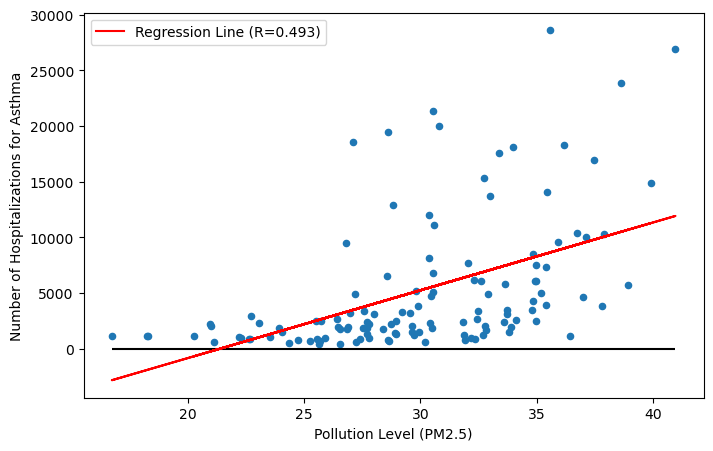

Correlation between PM2.5 density and hopsitalisation for asthma: 0.493


In [13]:
# Initialize the figure for the scatter plot
figure = plt.figure()

# Create a scatter plot to examine the relationship between PM2.5 and hospitalizations
fig1 = airquality_hospitalizations_df.plot.scatter('PM2.5', 'Hosp.', figsize=(8, 5))
fig1.set_ylabel('Number of Hospitalizations for Asthma')
plt.xlabel('Pollution Level (PM2.5)')

# Extract x and y data for plotting and regression analysis
x_data = airquality_hospitalizations_df['PM2.5']
y_data = airquality_hospitalizations_df['Hosp.']

# Add a horizontal line at y=0 for reference
plt.hlines(0, min(x_data), max(x_data), colors='black')

# Perform linear regression to determine the correlation
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
y_regression_line = slope * x_data + intercept

# Plot the regression line on the scatter plot
plt.plot(x_data, y_regression_line, color='red', label=f'Regression Line (R={r_value:.3f})')
plt.legend()

# Save the figure as a PNG file for presentation purposes
plt.savefig('Images/PM25_and_Hospitalization_USStates.png')

# Display the plot
plt.show()

# Print the correlation coefficient bewteen PM2.5 and Number of hospitalisation
print(f"Correlation between PM2.5 density and hopsitalisation for asthma: {r_value:.3f}")

## Analysis of Correlation Between PM2.5 Levels and Asthma-Related Hospitalizations

The scatter plot and linear regression model displayed in the graph above illustrate the relationship between PM2.5 concentrations (a measure of air pollution) and asthma-related hospitalizations across US states. 

### Key Observations:
1. **Positive Correlation**: There is a moderate positive correlation (R=0.493) between PM2.5 levels and the number of hospitalizations due to asthma. This indicates that, generally, higher PM2.5 concentrations are associated with an increase in hospital admissions for asthma, supporting the hypothesis that poor air quality may exacerbate asthma symptoms.

2. **Non-Linear Pattern**: Although the scatter plot demonstrates a clear upward trend, the data points suggest that a simple linear model may not capture the full complexity of the relationship. A quadratic or exponential model might better represent the increase in hospitalizations at higher PM2.5 concentrations, where hospitalization numbers seem to rise more sharply.

3. **Data Variability**: There is notable variability in hospitalization numbers for similar PM2.5 levels, particularly in the 20-30 range. This suggests that additional factors, such as healthcare accessibility, population density, or regional healthcare practices, may also influence asthma-related hospital admissions.

In summary, while there is a visible trend showing that higher PM2.5 levels correspond to more asthma hospitalizations, a non-linear model might provide a more accurate fit. Further exploration with different models could enhance the precision of this analysis.


## Geographical Distribution

In [14]:
# Filter the data for the year 2018 only
airquality_hospitalizations_2018_df = airquality_hospitalizations_df.loc[airquality_hospitalizations_df['Year'] == 2018, :]

try:
    # Import the Geoapify API key
    from api_keys import api_key_geoapify

    # Set up the Geoapify API endpoint and parameters
    base_url = "https://api.geoapify.com/v1/geocode/search?"
    params = {
        "apiKey": api_key_geoapify,
        "format": "json",
    }

    # Iterate through each row in the 2018 DataFrame to retrieve latitude and longitude for each state
    for index, row in airquality_hospitalizations_2018_df.iterrows():
        state_name = airquality_hospitalizations_2018_df.loc[index, 'State']

        # Print current status for tracking
        print(f"Fetching coordinates for: {state_name}...")

        # Update params with the state name as the search text
        params["text"] = state_name

        # Make the request to Geoapify and parse the response
        response = requests.get(base_url, params=params).json()

        # Store latitude and longitude in the DataFrame
        airquality_hospitalizations_2018_df.loc[index, 'Lat'] = response['results'][0]['lat']
        airquality_hospitalizations_2018_df.loc[index, 'Lon'] = response['results'][0]['lon']

    # Display the updated DataFrame
    display(airquality_hospitalizations_2018_df)

except:
    # Error handling for missing or incorrect API key
    print("Error: No API key found or incorrect API key.")
    print("To resolve:")
    print("1. Create a file named `api_keys.py`.")
    print('2. In that file, add the line: `api_key_geoapify = "YOUR_API_KEY"`.')
    print("3. Replace `YOUR_API_KEY` with your actual Geoapify API key.")
    print("4. Restart the kernel and run this notebook again.")


Fetching coordinates for: Arizona...
Fetching coordinates for: California...
Fetching coordinates for: Colorado...
Fetching coordinates for: Connecticut...
Fetching coordinates for: Florida...
Fetching coordinates for: Kentucky...
Fetching coordinates for: Maryland...
Fetching coordinates for: Massachusetts...
Fetching coordinates for: Michigan...
Fetching coordinates for: Minnesota...
Fetching coordinates for: New Jersey...
Fetching coordinates for: New Mexico...
Fetching coordinates for: New York...
Fetching coordinates for: Oregon...
Fetching coordinates for: Pennsylvania...
Fetching coordinates for: Rhode Island...
Fetching coordinates for: Tennessee...
Fetching coordinates for: Utah...
Fetching coordinates for: Washington...
Fetching coordinates for: Wisconsin...


,State,Year,PM2.5,Hosp.,Lat,Lon
3,Arizona,2018,27.994505,3161,34.395342,-111.763275
10,California,2018,37.455983,16975,36.701463,-118.755997
15,Colorado,2018,27.782857,2236,38.725178,-105.607716
21,Connecticut,2018,28.950549,2451,41.650020,-72.734216
28,Florida,2018,32.992350,13711,27.756767,-81.463983
35,Kentucky,2018,27.519337,1856,37.572603,-85.155141
41,Maryland,2018,33.718906,3156,39.516240,-76.938207
45,Massachusetts,2018,35.162088,5015,42.378877,-72.032366
50,Michigan,2018,34.946593,6062,43.621195,-84.682435
55,Minnesota,2018,33.813187,1548,45.989659,-94.611329


In [19]:
try:
    # Configure and plot the map using Holoviews
    map_plot_1 = airquality_hospitalizations_2018_df.hvplot.points(
        'Lon',            # Longitude for x-axis
        'Lat',            # Latitude for y-axis
        geo=True,         # Enable geographic plotting
        tiles="OSM",      # Use OpenStreetMap tiles as the base map
        frame_width=800,  # Set map width
        frame_height=600, # Set map height
        size="Hosp.",     # Set point size based on the number of hospitalizations
        scale=0.5,        # Scale the point sizes
        color="PM2.5",    # Color points based on PM2.5 concentration
        cmap='bkr'        # Colormap for the PM2.5 data (blue to red gradient)
    )

    # Display the interactive map
    display(map_plot_1)

    # Save the map output to the Images folder
    from holoviews import save
    save(map_plot_1, 'Images/PM25_and_Hospitalization_Map_2018.png', fmt='png')
    

except:
    # Error handling for missing dependencies or data issues
    print("Please run the data processing block above first and ensure your API key is valid.")


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (PM2.5,Hosp.)

Please run the data processing block above first and ensure your API key is valid.


## Conclusion

### Answer to Key Question:
**Does air quality impact hospital admissions due to asthma?**

Based on the data analyzed, we observe a positive correlation between PM2.5 concentrations and asthma-related hospital admissions across US states. Although the available data do not establish a causal relationship, the results support our initial hypothesis: higher PM2.5 levels are associated with increased asthma hospitalizations. This suggests that poorer air quality may contribute to more severe asthma symptoms, potentially leading to more frequent hospital admissions.

While these findings align with expectations that elevated PM2.5 levels can exacerbate respiratory conditions, the correlation alone does not confirm causation. Further research, perhaps with controlled studies, would be necessary to establish a causal link. Nonetheless, this analysis underscores the potential public health impact of air pollution, supporting efforts to improve air quality as a means to mitigate asthma-related health risks.
